In [12]:
MY_SECRET_KEY="<YOUR_ROBOFLOW_SECRET_KEY>"

In [9]:
!pip install ultralytics
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [13]:
rf = Roboflow(api_key=MY_SECRET_KEY)
project = rf.workspace("-jwzpw").project("continuous_fire")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.81, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to continuous_fire-6 in yolov8:: 100%|██████████| 5030/5030 [00:02<00:00, 2360.92it/s]


In [14]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire/data.yaml epochs=1 imgsz=640 plots=True

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/continuous_fire-6/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

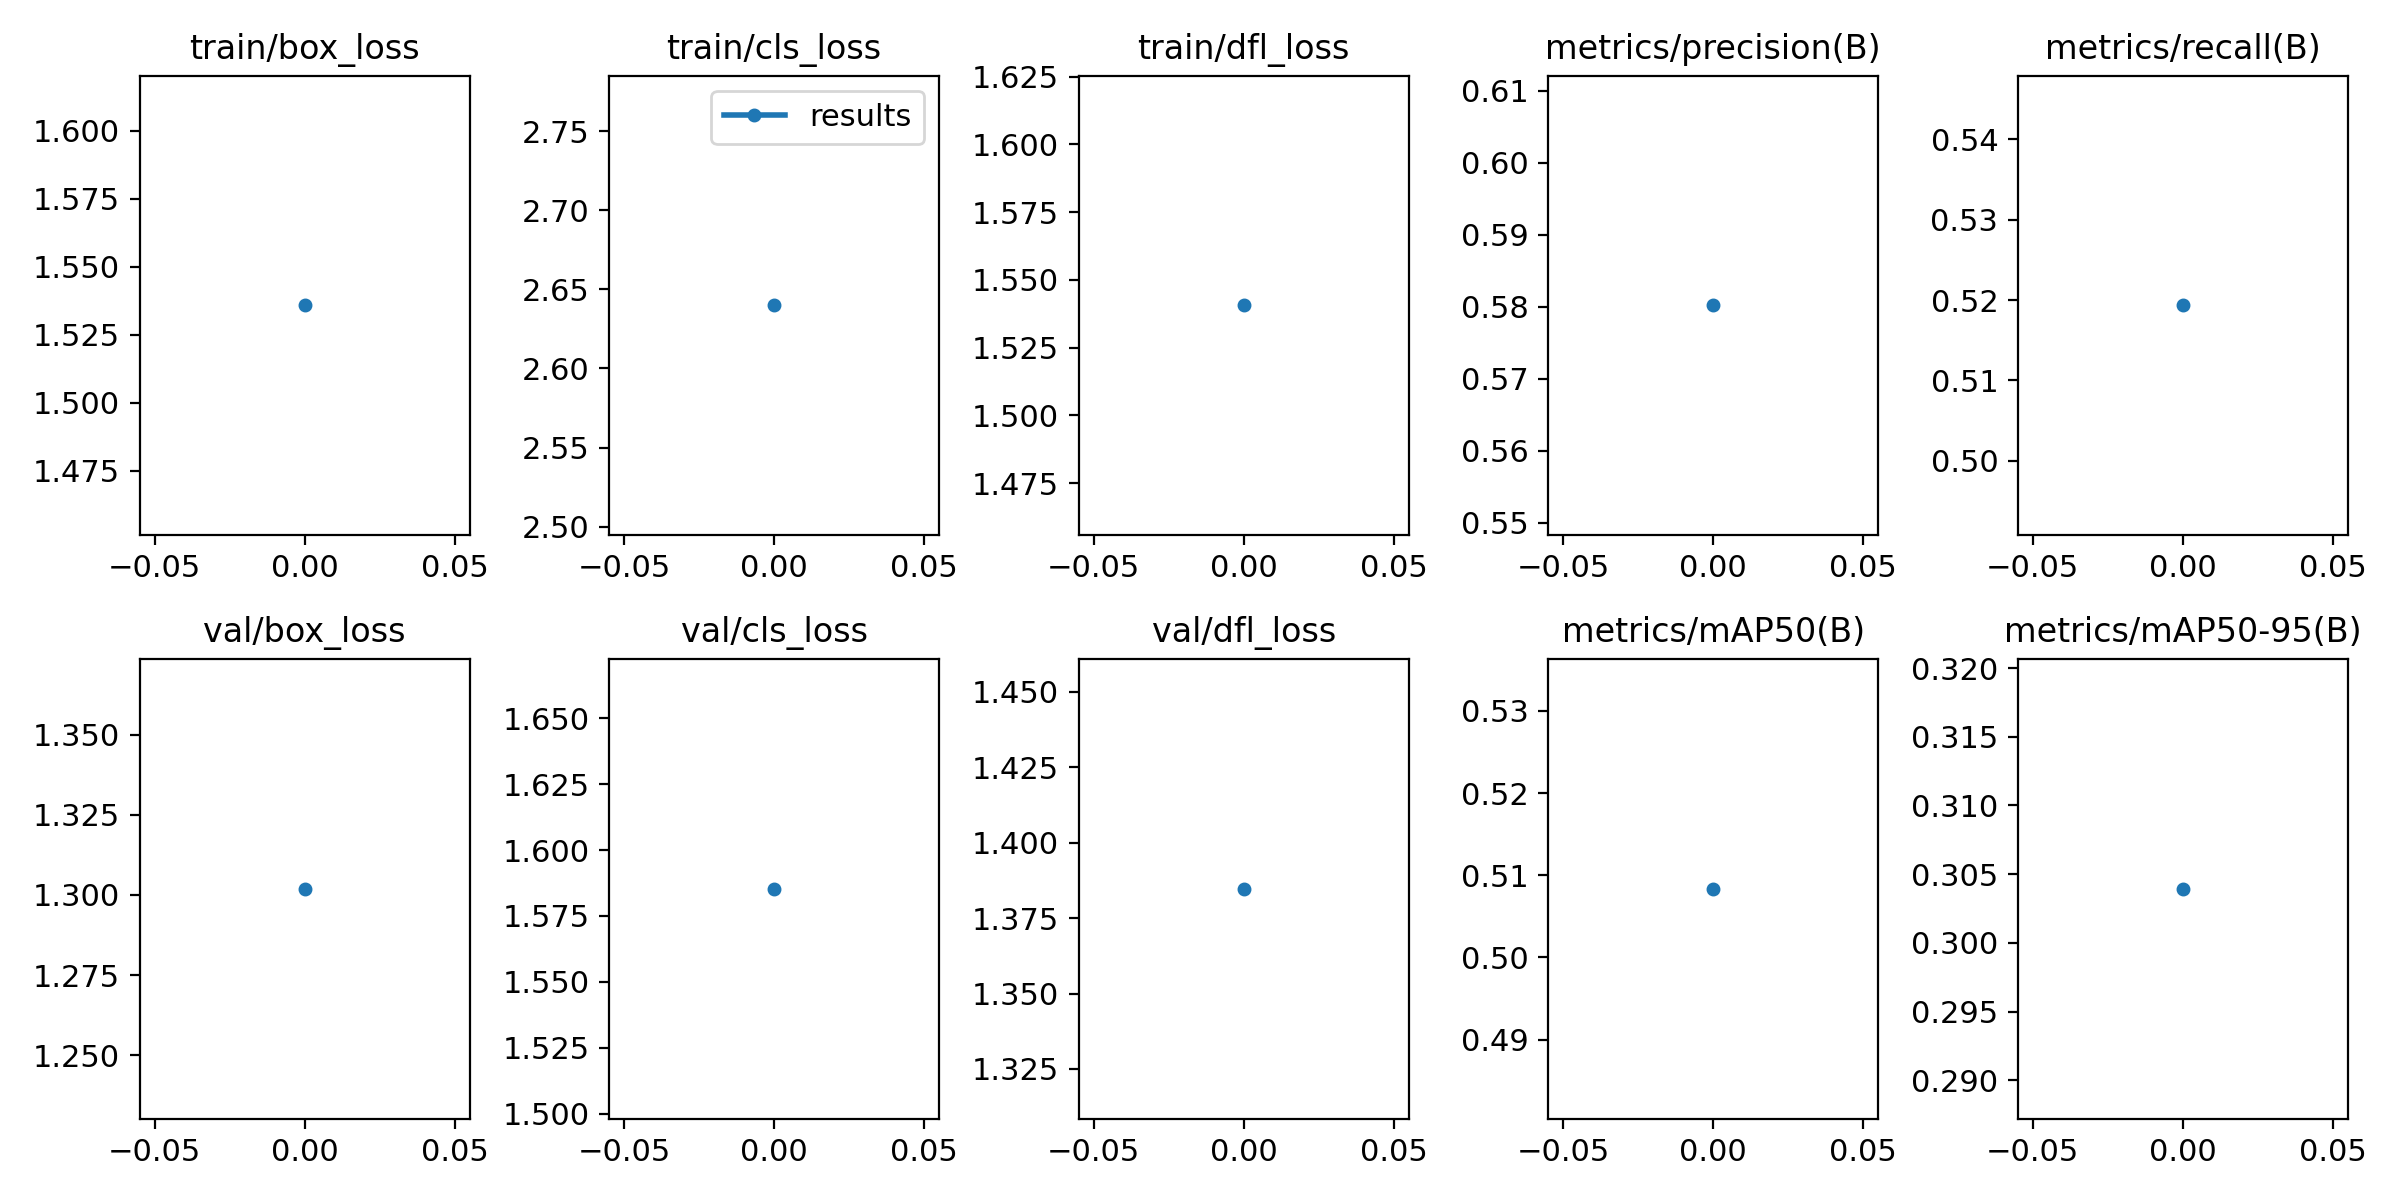

In [16]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [ ]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/continuous_fire-6/data.yaml

Ultralytics YOLOv8.0.81 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:13<00:00,  3.48it/s]
                   all        754        950       0.83      0.735      0.824       0.56
Speed: 0.6ms preprocess, 9.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
